# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>NAME: Iheagwara Ifeanyi</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Read csv
df = pd.read_csv("winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**There are therefore no categorical columns present**

**There are also no missing variables present so we proceed to the next step.**

In [5]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


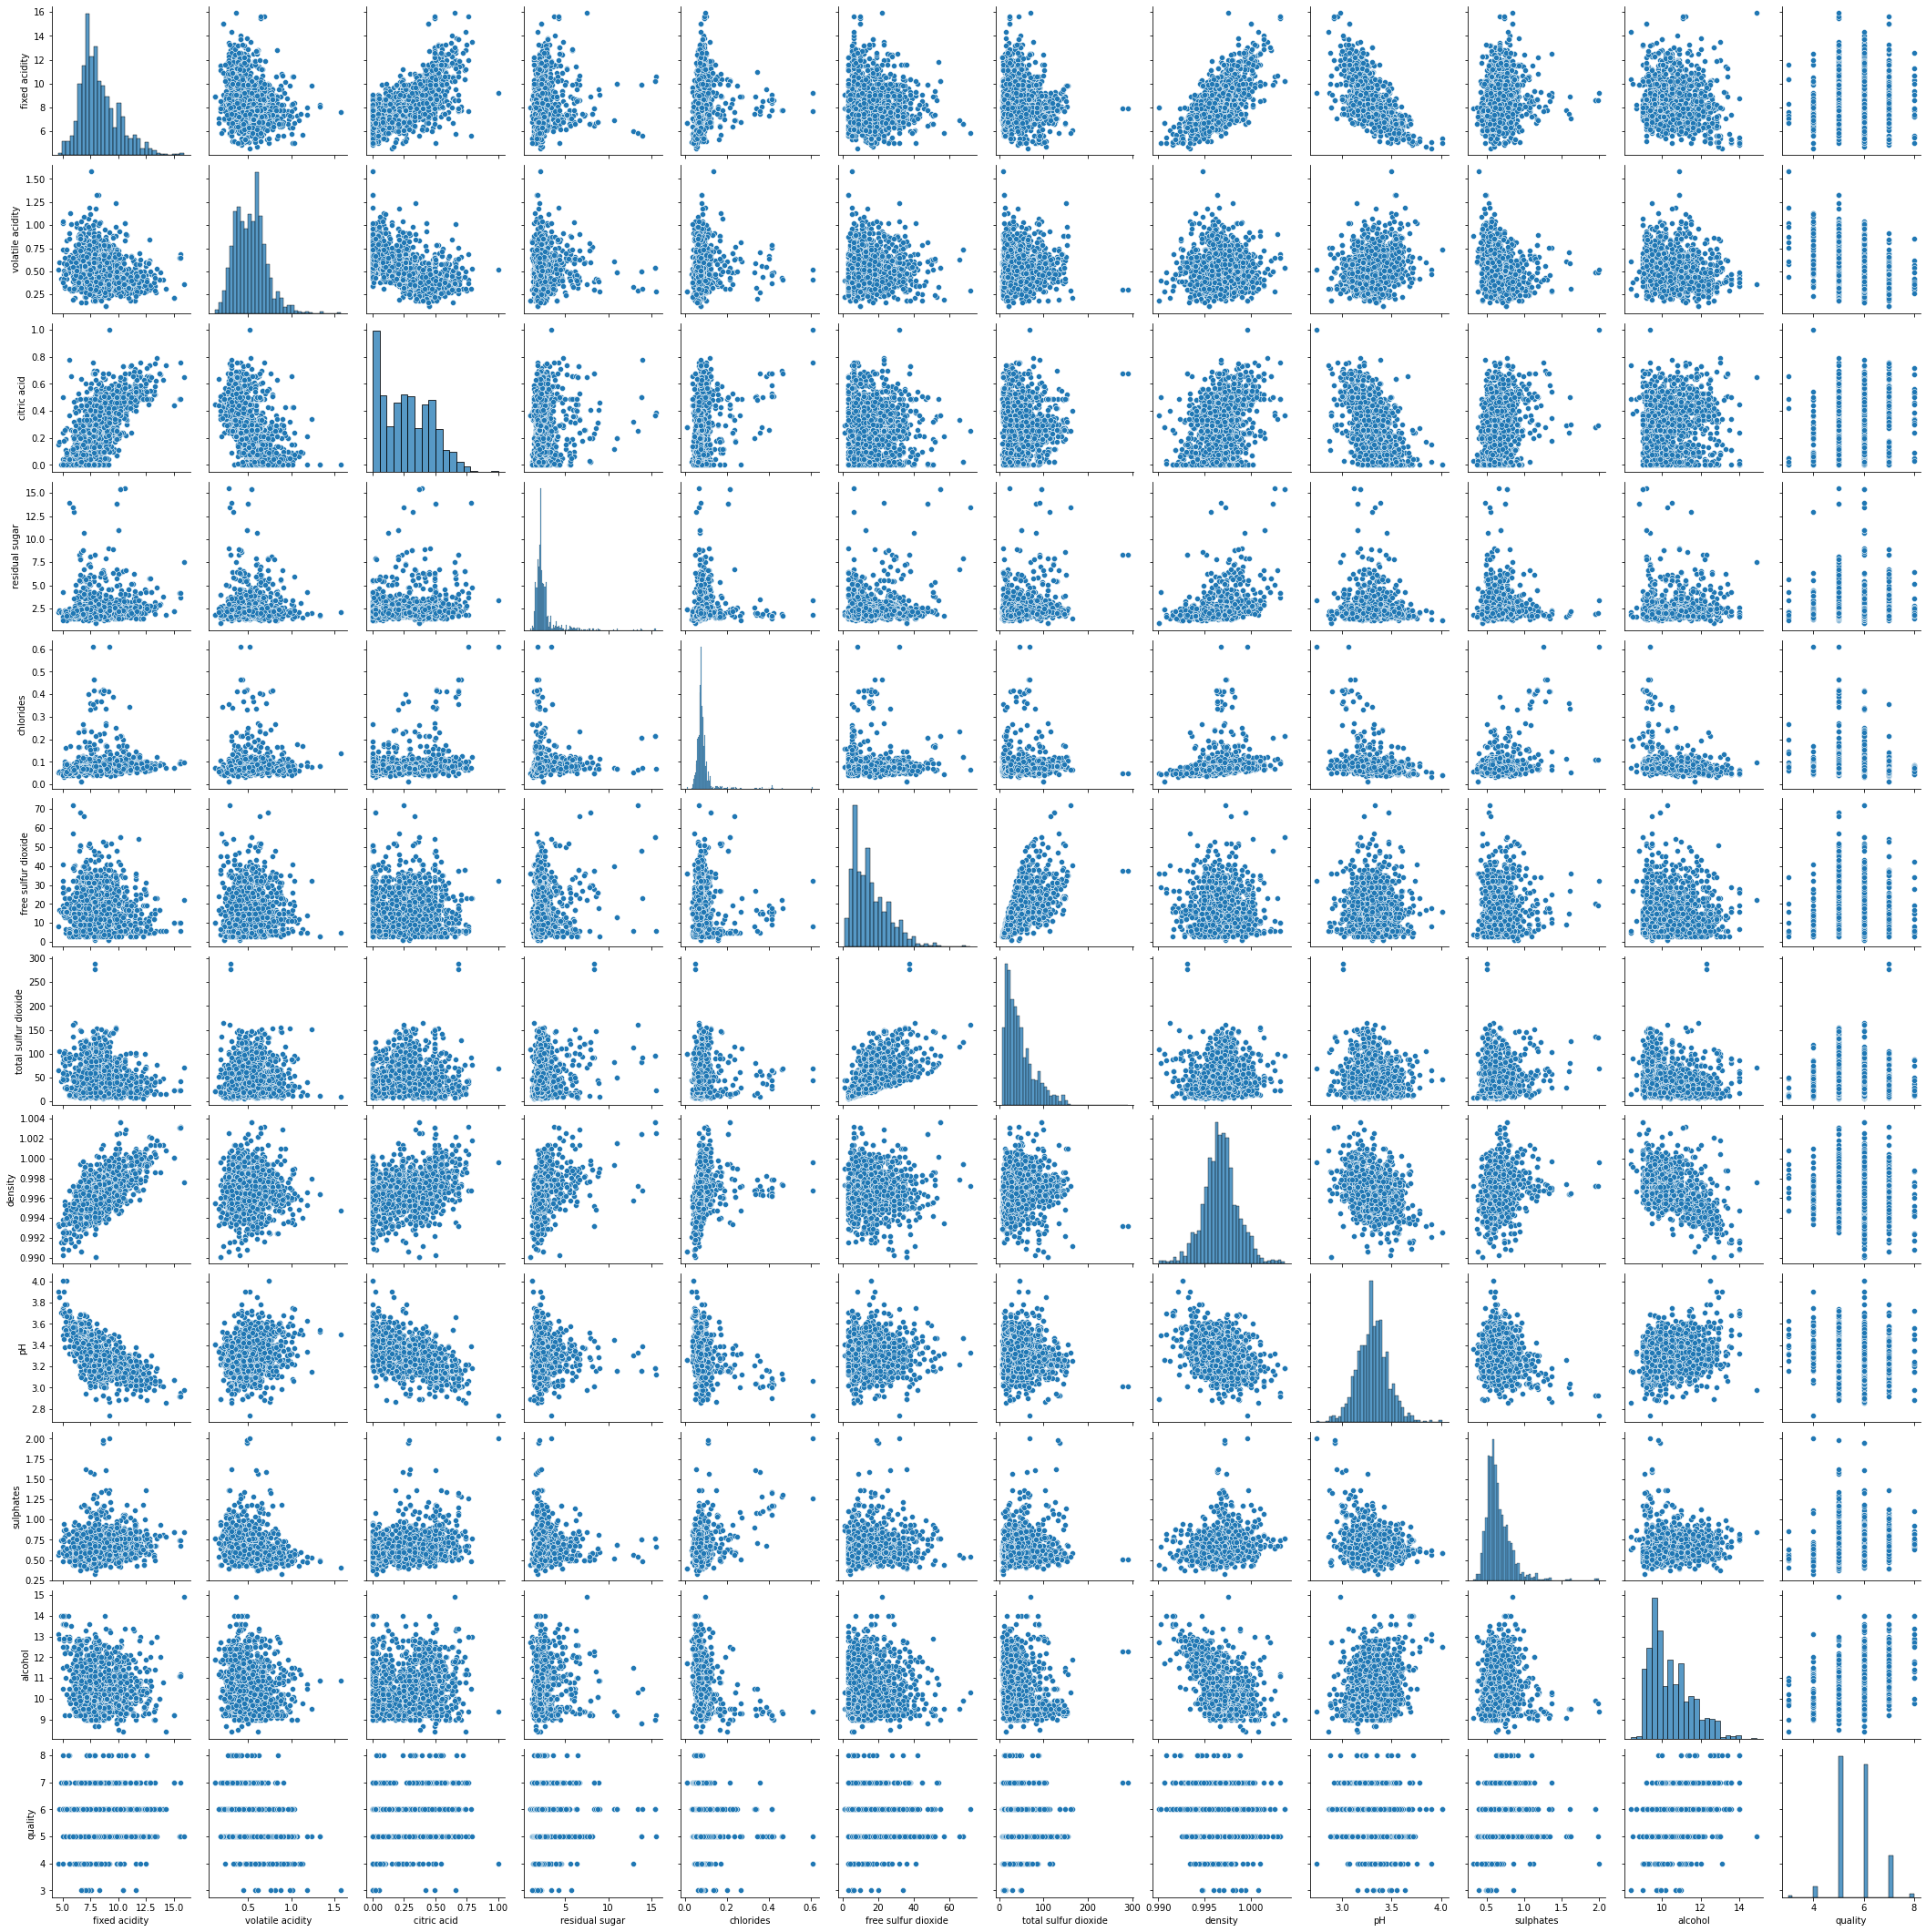

In [6]:
sns.pairplot(df)

# Exploratory Data Analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

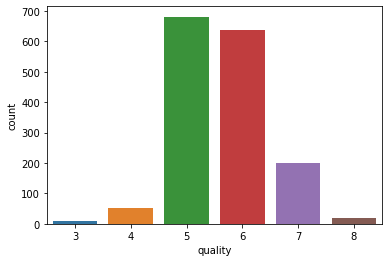

In [7]:
# Our label Distribution (countplot)
sns.countplot (x = "quality", data = df)
plt.show()

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citric acid', ylabel='Density'>

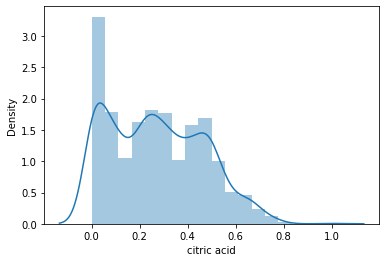

In [8]:
# Example EDA (distplot)
import seaborn as sns
sns.distplot(df["citric acid"])

<Figure size 864x432 with 0 Axes>

<AxesSubplot:>

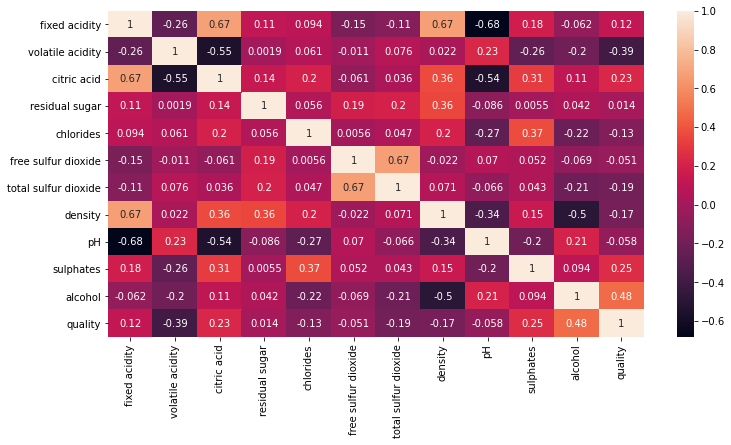

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**There are outliers in most of the columns**
**the min and max of the residual sugar, chlorides, free sulfer dioxide and total sulfer dioxide shows too much difference.**
**this could explain the outliers. however, citric acid seems to be uniformly distributed**

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

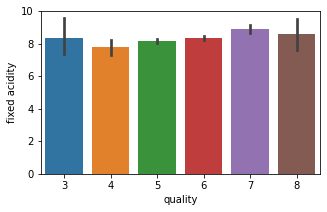

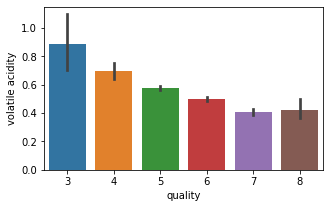

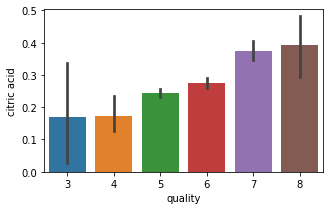

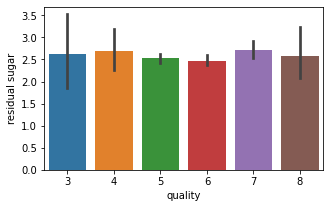

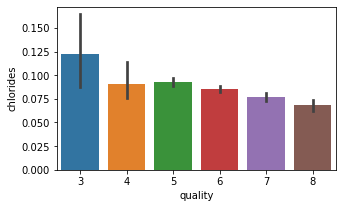

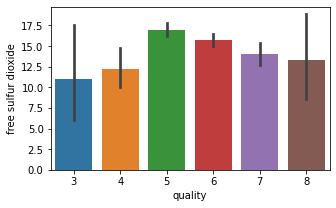

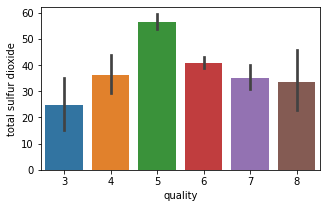

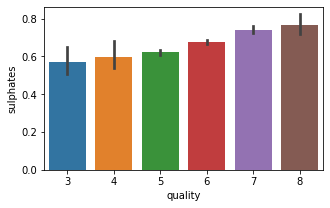

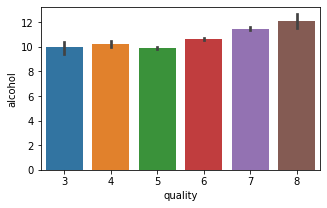

In [11]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

**The fixed acidity has no play with the quality of wine**

**The volatile acidity goes down as the quality increase**

**Citric acid goes  up as the quality of wine increase**

**Residual sugars has no play with the quality of wine**

**Chloride decreases as the quality increases**

**Free and Total sulfur dioxides has no play with the quality of wine**

**Sulphates level goes higher with the quality of wine**

**Alcohol level increases as the quality of wine increases**

In [12]:
df.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

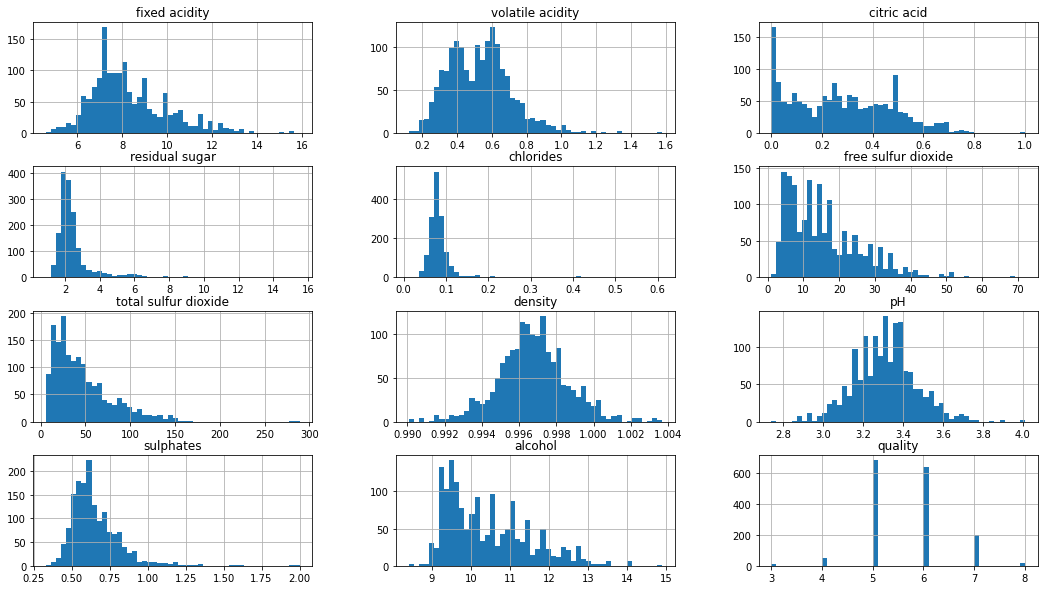

In [13]:
df.hist(bins=50, figsize=(18,10))

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [14]:
print (f' total number of duplicated values: {df.duplicated().sum()}')

 total number of duplicated values: 240


In [15]:
df = df [~df.duplicated()]

In [16]:
df['quality'].unique()
df["quality"].value_counts()

array([5, 6, 7, 4, 8, 3], dtype=int64)

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

## Feature Engineering

In [17]:
def Quality(x):
    if x == 3:
        return "low"
    elif x == 4:
        return "low"
    elif x == 5:
        return "medium"
    elif x == 6:
        return "medium"
    elif x == 7:
        return "high"
    elif x == 8:
        return "high"
    else:
        pass

In [18]:
df.quality = df.quality.apply(Quality)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,medium


In [20]:
df["quality"].value_counts()

medium    1112
high       184
low         63
Name: quality, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder =LabelEncoder()
df.quality= labelencoder.fit_transform(df.quality)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2


In [23]:
df["quality"].value_counts()

2    1112
0     184
1      63
Name: quality, dtype: int64

In [24]:
#2 Medium
#0  High
#1  low

## Spliting, Scaling and Balancing The Data

In [25]:
#processing our data
x = df.drop(columns='quality')

y = df.quality

In [26]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
x = sc_X.fit_transform(x)

In [27]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x, y  = smote.fit_sample(x, y)

In [28]:
#to do random permutations of the collections
import sklearn.utils
df = sklearn.utils.shuffle(df)
df = df.reset_index(drop=True)

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
y_train.value_counts()

0    800
1    782
2    753
Name: quality, dtype: int64

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [30]:
# importing our models and metrics
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [31]:
#XGBClassifier
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5, random_state=0)
xgb.fit(x_train, y_train)
xpred = xgb.predict(x_test)

xgbCM = confusion_matrix(xpred, y_test)
xgbCM

print('Precision: ', precision_score(xpred, y_test, average='macro'))
print('Accuracy: ', accuracy_score(xpred, y_test))
print('Recall: ', recall_score(xpred, y_test, average= 'macro'))
print('F1 Score: ', f1_score(xpred, y_test, average= 'macro'))

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=0.6,
              colsample_bynode=0.5, colsample_bytree=0.6, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=2, scale_pos_weight=None, seed=27, subsample=0.52,
              tree_method='exact', validate_parameters=1, verbosity=None)

array([[295,   1,  71],
       [  8, 301,  31],
       [  9,  28, 257]], dtype=int64)

Precision:  0.8578371566533126
Accuracy:  0.8521478521478522
Recall:  0.8544194971358207
F1 Score:  0.8515228820858595


In [32]:
#Adaboost
ada = AdaBoostClassifier(n_estimators=1000, random_state =0)
ada.fit(x_train, y_train)
apred=ada.predict(x_test)

adaCM = confusion_matrix(apred, y_test)
adaCM

print('Precision: ', precision_score(apred, y_test, average='macro'))
print('Accuracy: ', accuracy_score(apred, y_test))
print('Recall: ', recall_score(apred, y_test, average= 'macro'))
print('F1 Score: ', f1_score(apred, y_test, average= 'macro'))

AdaBoostClassifier(n_estimators=1000, random_state=0)

array([[242,   0,  67],
       [  1, 290, 118],
       [ 69,  40, 174]], dtype=int64)

Precision:  0.7130361900556886
Accuracy:  0.7052947052947053
Recall:  0.7023529884008727
F1 Score:  0.7020961809351257


In [33]:
#Random forest
randomf = RandomForestClassifier(n_estimators=1000, random_state=0)
randomf.fit(x_train, y_train)
rpred = randomf.predict(x_test)

randomCM = confusion_matrix(rpred, y_test)
randomCM

print('Precision: ', precision_score(rpred, y_test, average='macro'))
print('Accuracy: ', accuracy_score(rpred, y_test))
print('Recall: ', recall_score(rpred, y_test, average= 'macro'))
print('F1 Score: ', f1_score(rpred, y_test, average= 'macro'))

RandomForestClassifier(n_estimators=1000, random_state=0)

array([[305,   0,  47],
       [  1, 315,  15],
       [  6,  15, 297]], dtype=int64)

Precision:  0.919802535749611
Accuracy:  0.916083916083916
Recall:  0.9173670560993852
F1 Score:  0.9163921185965097


In [34]:
#Decision Tree

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train, y_train)
dpred = dtree.predict(x_test)

treeCM = confusion_matrix(dpred, y_test)
treeCM

print('Precision: ', precision_score(dpred, y_test, average='macro'))
print('Accuracy: ', accuracy_score(dpred, y_test))
print('Recall: ', recall_score(dpred, y_test, average= 'macro'))
print('F1 Score: ', f1_score(dpred, y_test, average= 'macro'))

DecisionTreeClassifier(random_state=0)

array([[278,   2,  57],
       [  3, 302,  42],
       [ 31,  26, 260]], dtype=int64)

Precision:  0.8434703798213548
Accuracy:  0.8391608391608392
Recall:  0.8384773644511775
F1 Score:  0.8393682442702296


In [35]:
#Models

model_ev = pd.DataFrame({'Model': ["XGB", "Ada", "Random forest", "Decision Tree"], 
                         'Accuracy': [(accuracy_score(xpred, y_test)*100), (accuracy_score(apred, y_test)*100),
                                      (accuracy_score(rpred, y_test)*100), (accuracy_score(dpred, y_test)*100)]})
model_ev

,Model,Accuracy
0,XGB,85.214785
1,Ada,70.529471
2,Random forest,91.608392
3,Decision Tree,83.916084


**Random forest gave us the best model**

In [36]:
randomf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [37]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'barplot Represent feature importance ')

Text(0.5, 0, 'importance ')

Text(0, 0.5, 'features')

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


<BarContainer object of 11 artists>

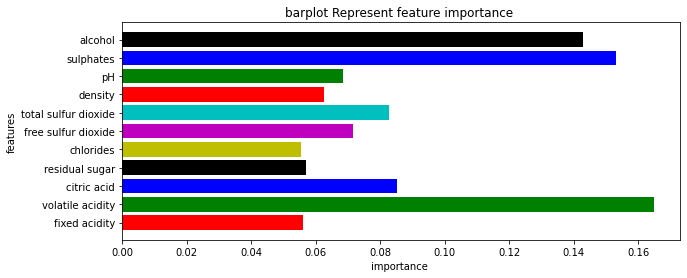

,Feature,Importance
0,fixed acidity,0.056062
1,volatile acidity,0.164792
2,citric acid,0.085125
3,residual sugar,0.057187
4,chlorides,0.055541
5,free sulfur dioxide,0.071466
6,total sulfur dioxide,0.082629
7,density,0.062573
8,pH,0.068472
9,sulphates,0.153223


In [38]:
#feature importances
#imp_feature = pd.DataFrame([df.columns, randomf.feature_importances_])

imp_feature = pd.DataFrame({'Feature': ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'], 'Importance': randomf.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

imp_feature

In [39]:
#Ensembling
from mlxtend.classifier import StackingCVClassifier
from sklearn.svm import SVC

In [40]:
scv = StackingCVClassifier(classifiers=[ada, randomf],meta_classifier= xgb, random_state=0)

scv.fit(x_train,y_train)
scv_predicted = scv.predict(x_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

StackingCVClassifier(classifiers=[AdaBoostClassifier(n_estimators=1000,
                                                     random_state=0),
                                  RandomForestClassifier(n_estimators=1000,
                                                         random_state=0)],
                     meta_classifier=XGBClassifier(base_score=0.5,
                                                   booster='dart',
                                                   colsample_bylevel=0.6,
                                                   colsample_bynode=0.5,
                                                   colsample_bytree=0.6,
                                                   gamma=0.6, gpu_id=-1,
                                                   importance_type='gain',
                                                   interaction_constraints='',
                                                   learning_rate=0.01,
                                                   max_

confussion matrix
[[305   1   6]
 [  0 315  15]
 [ 47  15 297]]


Accuracy of StackingCVClassifier: 91.6083916083916 

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       312
           1       0.95      0.95      0.95       330
           2       0.93      0.83      0.88       359

    accuracy                           0.92      1001
   macro avg       0.92      0.92      0.92      1001
weighted avg       0.92      0.92      0.92      1001



**Random forest gives the same accuracy as our ensemble model.**

**accurancy of 91.608**

In [41]:
#Hypertunning of our random forest

In [42]:
from sklearn.model_selection import cross_val_score, GridSearchCV

param = {'n_estimators': [1000], 'min_samples_split': [2, 3, 4]}

tunemodel = RandomForestClassifier(random_state=0, verbose=5)
grid = GridSearchCV(estimator=tunemodel, param_grid=param, n_jobs=-1, verbose=5)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   22.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   28.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tre

building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tree 692 of 1000
building tree 693 of 1000
building tree 694 of 1000
building tree 695 of 1000
building tree 696 of 1000
building tree 697 of 1000
building tree 698 of 1000
building tree 699 of 1000
building tree 700 of 1000
building tree 701 of 1000
building tree 702 of 1000
building tree 703 of 1000
building tree 704 of 1000
building tree 705 of 1000
building tree 706 of 1000
building tree 707 of 1000
building tree 708 of 1000
building tree 709 of 1000
building tree 710 of 1000
building tree 711 of 1000
building tree 712 of 1000
building tree 713 of 1000
building tree 714 of 1000
building tree 715 of 1000
building tree 716 of 1000
building tree 717 of 1000
building tree 718 of 1000
building tree 719 of 1000
building tree 720 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.8s finished


GridSearchCV(estimator=RandomForestClassifier(random_state=0, verbose=5),
             n_jobs=-1,
             param_grid={'min_samples_split': [2, 3, 4],
                         'n_estimators': [1000]},
             verbose=5)

In [43]:
grid.best_estimator_

RandomForestClassifier(n_estimators=1000, random_state=0, verbose=5)

In [44]:
cv_score = cross_val_score(RandomForestClassifier(n_estimators=1000, random_state=0, verbose=5), x_train, y_train, cv=20, n_jobs=-1)

print(cv_score.mean())

0.923780577659888


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

**The best performing model is the Random Forest Classifier because**

it was able to deal with the noise and outliers in the data

it had the highest accuracy, f1, precision and recall scores accross board.

with the fine tuning, we were sighly able to get a better accuracy score from 91.608 to 0.9237

**Model can be improved by**
Scaling the other features to see if it will help improve our model performance

A larger dataset